In [5]:
import numpy as np
import pickle
import pandas as pd
import seaborn as sns

In [6]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [7]:
#get classical kernel
from sklearn.metrics.pairwise import rbf_kernel

In [8]:
import os 
from scipy.stats import entropy
from Kernels.src.Preprocessing import Load_kernels


In [5]:
 #calculate the Jensen-Shannon divergence
def js_div(vector1, vector2, bins = 50):
    # Calculate the histograms or PMFs of vector1 and vector2
    hist1, _ = np.histogram(vector1, bins= 50, density=True)
    hist2, _ = np.histogram(vector2, bins= 50, density=True)
    # Compute the average distribution
    average_distribution = 0.5 * (hist1 + hist2)
    # Calculate JSD
    jsd = 0.5 * (entropy(hist1, average_distribution) + entropy(hist2, average_distribution))
    return jsd


## Unsupervised


In [11]:
df_k_trend_100=pd.read_csv('Results/Unsupervised_100/clustering_100_opt_k_reviewed.csv')
df_k_trend_1000=pd.read_csv('Results/Unsupervised_1000/clustering_1000_opt_k_reviewed.csv')

Zfeaturemap does not have any entanglement--> Z
Substitute Z_full with Z

In [12]:
#Replace
df_k_trend_100.replace('Z_full','Z',inplace=True)
df_k_trend_1000.replace('Z_full','Z',inplace=True)


In [22]:
df_k_trend_100[df_k_trend_100['ftmap']=='Z']

,Unnamed: 0,ftmap,K,Max angle,s,geom_distance,concentration,silhouette,Score_cluster,v_intra,v_inter,N_samples,feature maps
90,90,Z,2,0.125,9084.079515,10.209208,0.050094,0.256441,0.228351,0.050854,0.025573,100,Z
91,91,Z,3,0.125,9084.079515,10.209208,0.050094,0.298991,0.339279,0.048797,0.027908,100,Z
92,92,Z,4,0.125,9084.079515,10.209208,0.050094,0.310641,0.397948,0.045740,0.029084,100,Z
93,93,Z,5,0.125,9084.079515,10.209208,0.050094,0.364036,0.471095,0.042005,0.027545,100,Z
94,94,Z,6,0.125,9084.079515,10.209208,0.050094,0.305408,0.465573,0.043009,0.030577,100,Z
95,95,Z,7,0.125,9084.079515,10.209208,0.050094,0.285081,0.471034,0.043088,0.033141,100,Z
96,96,Z,8,0.125,9084.079515,10.209208,0.050094,0.345813,0.528126,0.043389,0.032832,100,Z
97,97,Z,9,0.125,9084.079515,10.209208,0.050094,0.383182,0.572115,0.038049,0.031359,100,Z
98,98,Z,10,0.125,9084.079515,10.209208,0.050094,0.393029,0.613642,0.029711,0.031568,100,Z
99,99,Z,2,0.250,8017.914668,9.208021,0.027143,0.147482,0.133064,0.030278,0.010845,100,Z


In [13]:
df_k_trend_1000.rename(columns={'Bandwidth':'Max angle'},inplace=True)
df_k_trend_100.rename(columns={'Bandwidth':'Max angle'},inplace=True)

df_k_trend_100['feature maps']=df_k_trend_100['ftmap'].astype('category')
df_k_trend_1000['feature maps']=df_k_trend_1000['ftmap'].astype('category')

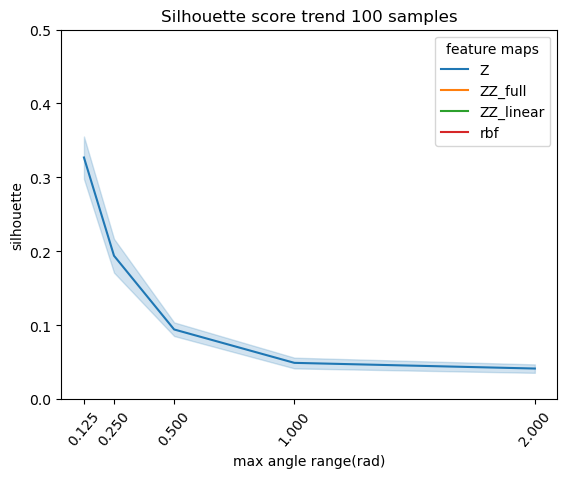

In [23]:
sns.lineplot(data=df_k_trend_100[df_k_trend_100['ftmap']=='Z'],
             x="Max angle",
             y="silhouette",
             hue='feature maps')
plt.title('Silhouette score trend 100 samples')
plt.xlabel('max angle range(rad)')
plt.ylim(0,0.5)
plt.xticks(df_k_trend_1000['Max angle'].unique(),rotation=50)
plt.show()

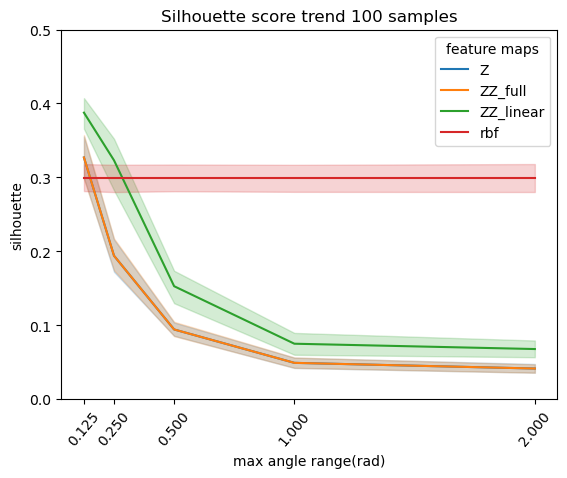

In [16]:
sns.lineplot(data=df_k_trend_100,
             x="Max angle",
             y="silhouette",
             hue='feature maps')
plt.title('Silhouette score trend 100 samples')
plt.xlabel('max angle range(rad)')
plt.ylim(0,0.5)
plt.xticks(df_k_trend_1000['Max angle'].unique(),rotation=50)
plt.show()




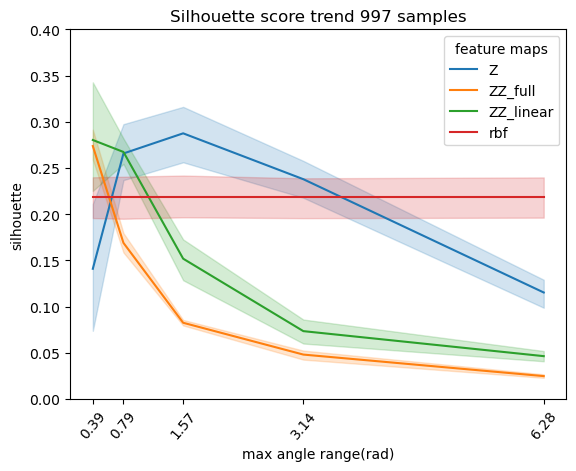

In [12]:
sns.lineplot(data=df_k_trend_1000,
             x="Max angle",
             y="silhouette",
             hue='feature maps')
plt.title('Silhouette score trend 997 samples')
plt.xlabel('max angle range(rad)')
plt.ylim(0,0.4)
plt.xticks(df_k_trend_1000['Max angle'].unique(),rotation=50)
plt.show()




In [13]:
def Prepare_data(df_k_trend_100):
    df_k_trend_100_plot=df_k_trend_100.copy()
    df_k_trend_100_plot.rename(columns={'Concentration':'kernel variance','silhouette':'Silhouette index'},inplace=True)
    idx_to_drop=df_k_trend_100_plot.loc[(df_k_trend_100_plot.ftmap=='rbf') & (df_k_trend_100_plot['Max angle']!=0.39)].index
    df_k_trend_100_plot.drop(idx_to_drop,axis=0,inplace=True)
    df_k_trend_100_plot['Class'] = df_k_trend_100_plot[['ftmap', 'Max angle']].astype(str).agg('-'.join, axis=1)
    df_k_trend_100_plot['Class'].replace('rbf-0.39','rbf',inplace=True)
    df_k_trend_100_plot=df_k_trend_100_plot.loc[df_k_trend_100_plot.K==3]
    df_k_trend_100_plot.set_index('Class',drop=False,inplace=True)
    return df_k_trend_100_plot


In [14]:
order=['rbf']
for i in ['Z', 'ZZ_linear','ZZ_full']:
    for j in ['0.39','0.79','1.57','3.14','6.28']:
        order.append(i+'-'+j)
        
        
        

In [15]:
df_k_trend_100_plot=Prepare_data(df_k_trend_100)
df_k_trend_100_plot_all=Prepare_data(df_k_trend_1000)


In [16]:
# Default outer join
df= pd.concat([df_k_trend_100_plot, df_k_trend_100_plot_all], axis=0)


In [17]:
df.rename(columns={'Class':'Class_'},inplace=True)
df.Class_=pd.Categorical(df.Class_,categories=order)
df=df.sort_values('Class_')

In [18]:
df

,Unnamed: 0,ftmap,K,Max angle,s,geom_distance,concentration,Silhouette index,Score_cluster,v_intra,v_inter,N_samples,feature maps,Class_
Class,,,,,,,,,,,,,,
rbf,1,rbf,3,0.39,32430.913273,1.627157,0.056611,0.231587,0.271871,0.057613,0.031667,100,rbf,rbf
rbf,1,rbf,3,0.39,239544.554266,2.629761,0.059385,0.265662,0.280265,0.058546,0.021910,997,rbf,rbf
Z-0.39,91,Z,3,0.39,25040.608221,20.189208,0.002070,0.430413,0.549524,0.008095,0.032544,100,Z,Z-0.39
Z-0.39,91,Z,3,0.39,214476.334430,29.057916,0.000883,0.279041,0.389611,0.002985,0.011172,997,Z,Z-0.39
Z-0.79,100,Z,3,0.79,19029.829612,14.274450,0.020541,0.428716,0.534704,0.013629,0.038190,100,Z,Z-0.79
Z-0.79,100,Z,3,0.79,122469.639066,24.588369,0.010689,0.338336,0.460717,0.006311,0.018052,997,Z,Z-0.79
Z-1.57,109,Z,3,1.57,6181.844241,10.886041,0.069247,0.335757,0.410807,0.045286,0.048015,100,Z,Z-1.57
Z-1.57,109,Z,3,1.57,83215.979985,22.347329,0.058392,0.340780,0.456721,0.026353,0.042047,997,Z,Z-1.57
Z-3.14,118,Z,3,3.14,75883.587901,20.064992,0.052239,0.196043,0.228020,0.060504,0.021927,997,Z,Z-3.14


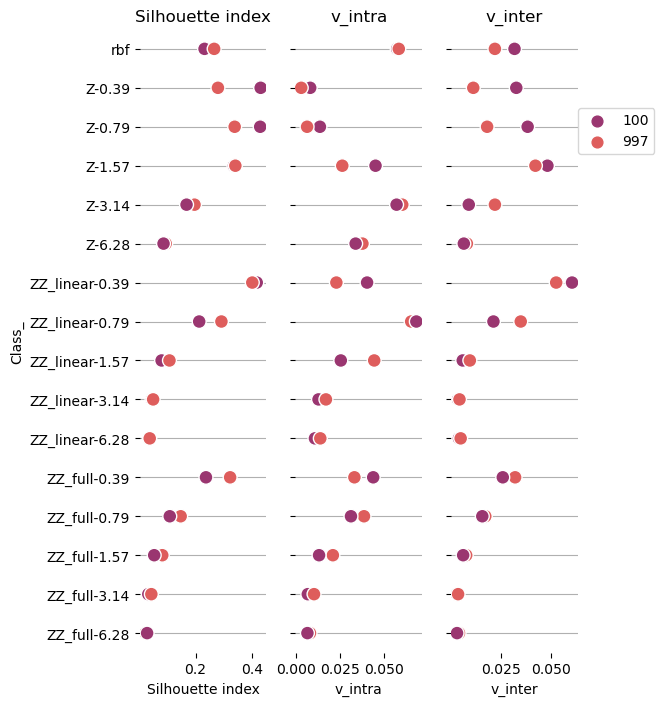

In [19]:
plt.close()
# Make the PairGrid
g = sns.PairGrid(df,
                 x_vars=['Silhouette index','v_intra','v_inter'], y_vars=["Class_"],
                 hue='N_samples',
                 height=7, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['Silhouette index','v_intra','v_inter']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.legend(loc=(1,0.8))
plt.show()


In [20]:
qkernel=Load_kernels('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Kernels_Results/Bandwidth/Sampled_data/ZZ_linear/bandwidth_k/qk_tot_pi_0.39.pickle')
qkernel_all=Load_kernels('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Kernels_Results/Bandwidth/Full_data/ZZ_linear/bandwidth_k/qk_tot_pi_0.39.pickle')

In [21]:
data_input = pd.read_csv("../Input_data/PCA_METABRIC_20cmp_IC10.csv", sep = ",")
n_qubits=2

#SELECT FT
features=[]
for i in range(1,n_qubits+1):
    name_cna='Component_'+str(i)+'_cna'
    name_exp='Component_'+str(i)+'_exp'
    features.append(name_cna)
    features.append(name_exp)
labels = 'IntClustMemb'

#Full classes
df_tot_sel_10=data_input.loc[:,features]

In [22]:
#Sample 100
samp_size=100
df_sampled=df_tot_sel_10.sample(samp_size,random_state=89)


In [23]:
#Classical kernel
gamma=1 / (n_qubits*2 * df_sampled.to_numpy().var())
K_classic_tr_100 = rbf_kernel(df_sampled, gamma = gamma)

In [24]:
#Classical kernel
gamma=1 / (n_qubits*2 * df_tot_sel_10.to_numpy().var())
K_classic_tr_1000 = rbf_kernel(df_tot_sel_10, gamma = gamma)

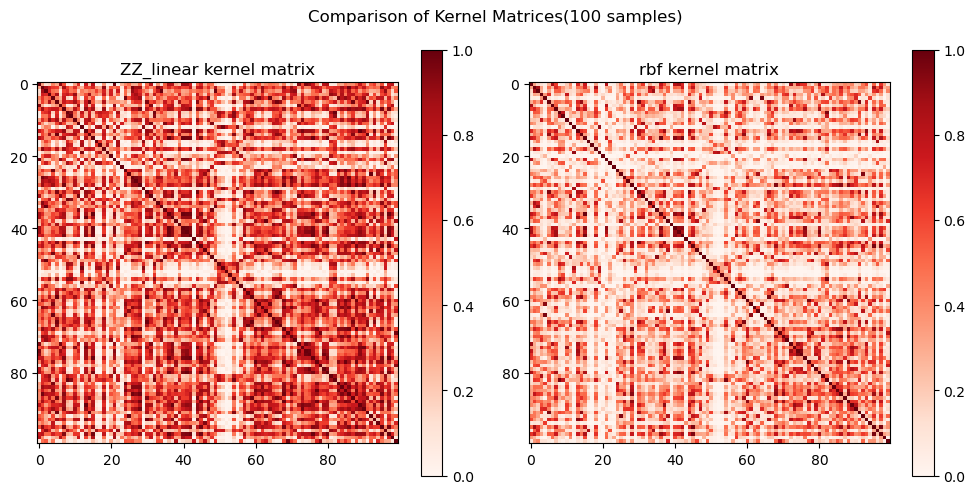

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first subplot
im1 = axs[0].imshow(np.asmatrix(qkernel), interpolation="nearest", origin="upper", cmap="Reds",vmin=0, vmax=1)
axs[0].set_title("ZZ_linear kernel matrix")
cbar1 = fig.colorbar(im1, ax=axs[0])
#cbar1.set_

# Plot the second subplot
im2 = axs[1].imshow(np.asmatrix(K_classic_tr_100), interpolation="nearest", origin="upper", cmap="Reds",vmin=0, vmax=1)
axs[1].set_title("rbf kernel matrix")
cbar2 = fig.colorbar(im2, ax=axs[1])

# Add a main title to the entire figure
fig.suptitle("Comparison of Kernel Matrices(100 samples)")

#plt.colorbar(im2)
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

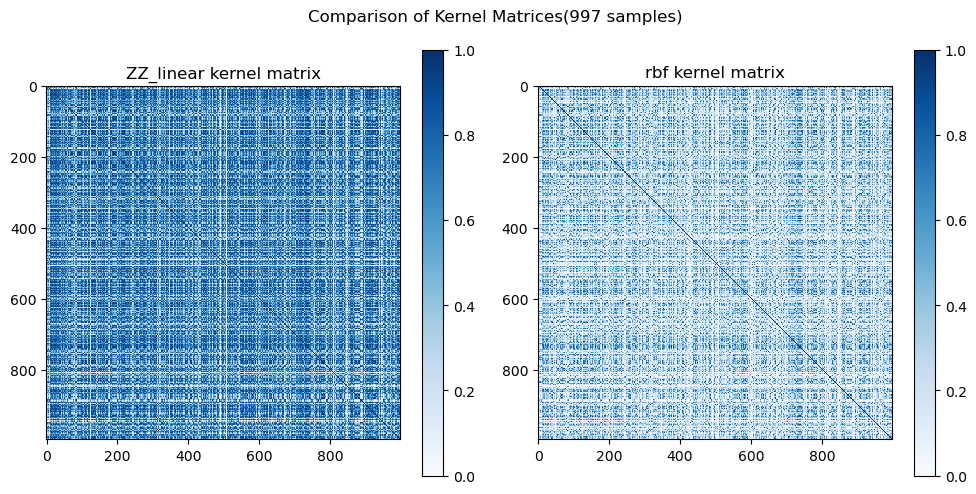

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first subplot
im1 = axs[0].imshow(np.asmatrix(qkernel_all), interpolation="nearest", origin="upper", cmap="Blues",vmin=0, vmax=1)
axs[0].set_title("ZZ_linear kernel matrix")
cbar1 = fig.colorbar(im1, ax=axs[0])
#cbar1.set_

# Plot the second subplot
im2 = axs[1].imshow(np.asmatrix(K_classic_tr_1000), interpolation="nearest", origin="upper", cmap="Blues",vmin=0, vmax=1)
axs[1].set_title("rbf kernel matrix")
cbar2 = fig.colorbar(im2, ax=axs[1])

# Add a main title to the entire figure
fig.suptitle("Comparison of Kernel Matrices(997 samples)")

#plt.colorbar(im2)
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

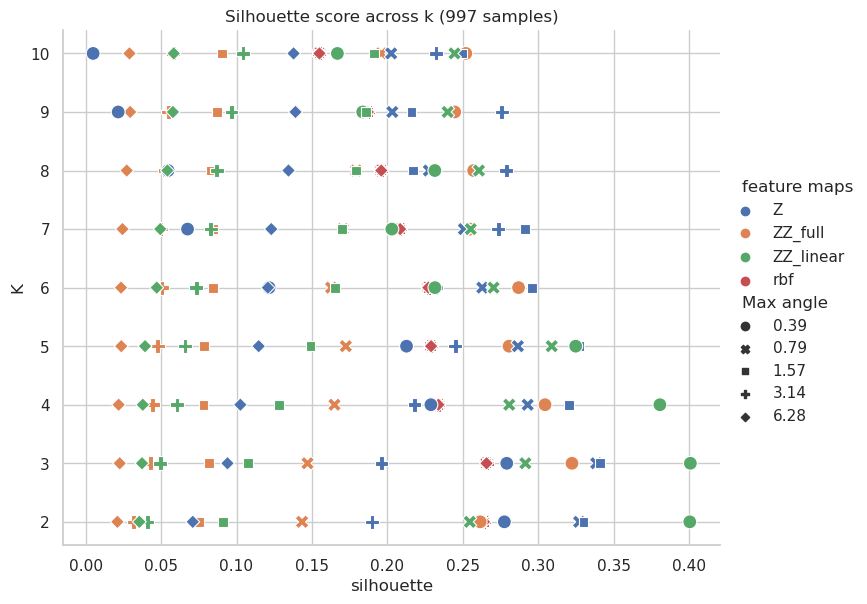

In [27]:
plt.close()
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_k_trend_1000,
    style="Max angle", x="silhouette",
    hue="feature maps",
    y="K",s=100,
    sizes=(10, 200),
    height=6, aspect=1.25,
    
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
#g.ax.set_xlim(-0.15,0.45)
#g.despine(left=True, bottom=True)



plt.title('Silhouette score across k (997 samples)')
#plt.xlabel('Number of Clusters')
# Show the plot
plt.savefig('../Results/images/Clustering/opt_k_997.png')
plt.show()







In [ ]:
plt.close()
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_k_trend_100,
    style="Max angle", x="silhouette",
    hue="feature maps",
    y="K",s=90,
    sizes=(10, 200),
    height=6, aspect=1.25,
    
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
#g.despine(left=True, bottom=True)
g.ax.set_xlim(-0.15,0.45)


plt.title('Silhouette score(100 samples)')
#plt.xlabel('Number of Clusters')
# Show the plot
plt.savefig('../Results/images/Clustering/opt_k_100.png')
plt.show()




In [ ]:
plt.close()
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_k_trend_100,
    x="K", y="silhouette",
    hue="feature maps", size='Max angle',
    palette="Paired", sizes=(10, 200),
    
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)


plt.title('Silhouette score(100 samples)')
plt.xlabel('Number of Clusters')
# Show the plot
plt.show()

In [ ]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_k_trend_1000,
    x="K", y="silhouette", col="ftmap", hue="ftmap",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_k_trend_1000, x="K", y="silhouette", units="ftmap",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Silhouette")
g.tight_layout()

## New Clusters

- ZZ linear(0.39) k=3

- Z(1.57) k=8

In [ ]:
def Scale(x, out_range=(-1, 1), axis=None):
    domain = np.min(x, axis), np.max(x, axis)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2


In [ ]:
data_input = pd.read_csv("../Input_data/PCA_METABRIC_20cmp_IC10.csv", sep = ",",index_col=0)

In [ ]:
df_new_clust=pd.DataFrame()
df_new_clust.index=data_input.index

In [ ]:
#ZZ_linear(0.39)
q_ZZ_linear_039=Load_kernels('../Kernels_Results/Bandwidth/Full_data/ZZ_linear/bandwidth_k/qk_tot_pi_0.39.pickle')


In [ ]:
spectral_3 = SpectralClustering(3, affinity="precomputed",n_init=10,random_state=42)
cluster_labels_3 = spectral_3.fit_predict(q_ZZ_linear_039)

In [ ]:
q_k_dist=1-Scale(q_ZZ_linear_039,(0,1))
np.fill_diagonal(q_k_dist,0)
silhouette_score(q_k_dist,metric='precomputed',labels=cluster_labels_3,random_state=42)

In [ ]:
df_new_clust['ZZ_linear_039']=cluster_labels_3


In [ ]:
#Z 1.57 k=8
q_Z_079=Load_kernels('../Kernels_Results/Bandwidth/Full_data/Z_linear/bandwidth_k/qk_tot_pi_0.79.pickle')
spectral_8 = SpectralClustering(8, affinity="precomputed",n_init=10,random_state=42)
cluster_labels_8 = spectral_8.fit_predict(q_Z_079)

df_new_clust['Z_039']=cluster_labels_8

RBF 997

In [ ]:
spectral_3_rbf = SpectralClustering(3, affinity="precomputed",n_init=10,random_state=42)
cluster_labels_3_rbf = spectral_3_rbf.fit_predict(K_classic_tr_1000)


In [ ]:
df_new_clust.to_csv('../Results/New_cluster_quantum_metabric.csv',sep=',')

## Supervised + altro

### Accuracy and other metrics

In [ ]:
df_supervised=pd.read_csv('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Results/Supervised_results.csv')
df_supervised=df_supervised[df_supervised.ftmap!='Z_full']
df_supervised.replace('Z_linear','Z',inplace=True)
df_supervised['feature maps']=df_supervised['ftmap'].astype('category')


In [ ]:

df_supervised.rename(columns={'train_error':'train'},inplace=True)
df_supervised.rename(columns={'test_error':'test'},inplace=True)

In [ ]:
df_supervised

In [ ]:
##Plot ACCURACY
prova=pd.melt(df_supervised,id_vars=["Bandwidth","feature maps","N_classes"],value_vars=["test","train"])
prova.rename(columns={'variable':'train/test','value':'accuracy'},inplace=True)
# Draw a pointplot to show pulse as a function of three categorical factors

g4 = sns.catplot(data=prova.sort_values(by='train/test',ascending=False), x="Bandwidth", y="accuracy", hue="feature maps", col="N_classes",
                row='train/test',capsize=.2,kind="point")

g4.despine(left=True)
g4.set(xlabel='Max angle(rad)')


In [ ]:
plt.close()
col_order = ['rbf', 'Z','ZZ_linear', 'ZZ_full']
sns.set_theme(style="whitegrid")

acc=sns.relplot(data=prova, x="Bandwidth", y="accuracy", row="N_classes",col='feature maps',hue='feature maps',
                style='train/test',kind="line",col_order=col_order,linewidth = 3)
acc.despine(left=True)
acc.set(xlabel='Max angle(rad)')

# Set labels for each row
sns.set(font_scale=1.5)
row_labels=['10 classes', '4 classes']
for ax, label in zip(acc.axes.flat, col_order*2):
    ax.set_title(label)
    


plt.savefig('../Results/images/Accuracy_sup.png')

plt.show()

In [ ]:
plt.close()
col_order = ['4_classes', '10_classes']
sns.set_theme(style="whitegrid")

acc=sns.relplot(data=prova, x="Bandwidth", y="accuracy", col="N_classes",hue='feature maps',
                style='train/test',kind="line",col_order=col_order,linewidth = 1.5)
acc.despine(left=True)
acc.set(xlabel='Max angle(rad)')

# Set labels for each row
sns.set(font_scale=1.5)
# row_labels=['10 classes', '4 classes']
# for ax, label in zip(acc.axes.flat, col_order):
#     ax.set_title(label)
    


plt.savefig('../Results/images/Accuracy_sup_2.png')

plt.show()

In [ ]:
plt.close()
col_order = ['rbf','BaseExceptionZ','ZZ_linear', 'ZZ_full']
sns.set_theme(style="whitegrid")

acc=sns.relplot(data=prova, x="Bandwidth", y="accuracy", row="N_classes",col='feature maps',hue='feature maps',
                style='train/test',kind="line",col_order=col_order,linewidth = 3)
acc.despine(left=True)
acc.set(xlabel='Max angle(rad)')

# Set labels for each row
sns.set(font_scale=1.5)
row_labels=['10 classes', '4 classes']
for ax, label in zip(acc.axes.flat, col_order):
    ax.set_title(label)
    


plt.savefig('../Results/images/Accuracy_sup.png')

plt.show()

In [ ]:
prova

In [ ]:
rbf_data_4_test = prova[(prova['feature maps'] == 'rbf') & (prova['N_classes'] == '4_classes') & (prova['train/test']=='test')]
rbf_data_4_train = prova[(prova['feature maps'] == 'rbf') & (prova['N_classes'] == '4_classes') & (prova['train/test']=='train')]

rbf_data_10_test = prova[(prova['feature maps'] == 'rbf') & (prova['N_classes'] == '10_classes') & (prova['train/test']=='test')]
rbf_data_10_train = prova[(prova['feature maps'] == 'rbf') & (prova['N_classes'] == '10_classes') & (prova['train/test']=='train')]

In [ ]:
col_order = ['Z','ZZ_linear', 'ZZ_full']
row_labels = ['10_classes', '4_classes']

sns.set_theme(style="whitegrid")

acc = sns.relplot(
    data=prova, x="Bandwidth", y="accuracy", row="N_classes", col='feature maps', hue='feature maps',
    style='train/test', kind="line", col_order=col_order, linewidth=3
)
acc.despine(left=True)
acc.set(xlabel='Max angle(rad)')

sns.set(font_scale=1.5)
for ax in zip(acc.axes.flat):
     print(ax)
     #ax.set_title(label)
     rbf_data = prova[(prova['feature maps'] == 'rbf') & (prova['N_classes'] == label)]
     sns.lineplot(data=rbf_data, x="Bandwidth", y="accuracy", color='red', linewidth=3, ax=ax, legend=False)


plt.show()

In [ ]:
import seaborn as sns

col_order = ['Z','ZZ_linear', 'ZZ_full']
row_labels = ['10_classes', '4_classes']

sns.set_theme(style="whitegrid")

acc = sns.relplot(
    data=prova, x="Bandwidth", y="accuracy", row="N_classes", col='feature maps', hue='feature maps',
    style='train/test', kind="line", col_order=col_order, linewidth=1.5
)
acc.despine(left=True)
acc.set(xlabel='Max angle(rad)')

# Set labels for each row
sns.set(font_scale=1.5)
for i, label in enumerate(row_labels):
    rbf_data_test = prova[(prova['feature maps'] == 'rbf') & (prova['N_classes'] == label) & (prova['train/test']=='test')]
    rbf_data_train = prova[(prova['feature maps'] == 'rbf') & (prova['N_classes'] == label) & (prova['train/test']=='train')]
    ax = acc.facet_axis(i, 0)
    ax2 = acc.facet_axis(i,1 )
    ax3 = acc.facet_axis(i,2 )

    ax.plot(rbf_data_test['Bandwidth'], rbf_data_test['accuracy'], '-',color='red', linewidth=1.5, label='rbf')
    ax2.plot(rbf_data_test['Bandwidth'], rbf_data_test['accuracy'],'-', color='red', linewidth=1.5, label='rbf')
    ax3.plot(rbf_data_test['Bandwidth'], rbf_data_test['accuracy'],'-', color='red', linewidth=1.5, label='rbf')
    #Train
    ax.plot(rbf_data_train['Bandwidth'], rbf_data_train['accuracy'], '--',color='red', linewidth=1.5, label='rbf')
    ax2.plot(rbf_data_train['Bandwidth'], rbf_data_train['accuracy'],'--', color='red', linewidth=1.5, label='rbf')
    ax3.plot(rbf_data_train['Bandwidth'], rbf_data_train['accuracy'],'--', color='red', linewidth=1.5, label='rbf')


#plt.legend()
plt.show()


In [ ]:
prova[(prova['feature maps'] == 'rbf') & (prova['N_classes'] == label) & (prova['train/test']=='test') ]

### Pair Plots first 4 components

In [ ]:
data_input = pd.read_csv("../Input_data/PCA_METABRIC_20cmp_IC10.csv", sep = ",")
n_qubits=2

#SELECT FT
features=[]
for i in range(1,n_qubits+1):
    name_cna='Component_'+str(i)+'_cna'
    name_exp='Component_'+str(i)+'_exp'
    features.append(name_cna)
    features.append(name_exp)
labels = 'IntClustMemb'

#Full classes
df_tot_sel_10=data_input
#select 4 classes
df_tot_sel_4=data_input.loc[(data_input.IntClustMemb == 8) | 
                          (data_input.IntClustMemb == 10)| 
                          (data_input.IntClustMemb == 4)|
                          (data_input.IntClustMemb == 5)]

### Cose

In [ ]:
g_pair=sns.pairplot(data=df_tot_sel_10[features+[labels]], 
                    hue=labels,
                    palette=sns.color_palette("Paired"))
#g_pair.savefig("PCA_pairplot_IC10_10classes.png") 
plt.show()
plt.close()

Divergence

In [ ]:
#Split data 4 classes
tr_size=70
ts_size=70
X_train_4,y_train_4,X_test_4,y_test_4=Split_and_sample(df_tot_sel_4,
                                                       features,
                                                       labels,
                                                       tr_sz=0.6,ts_sz=0.4,
                                                       tr_size=tr_size,ts_size=ts_size)
#Split data 10 classes
X_train_10,y_train_10,X_test_10,y_test_10=Split_and_sample(df_tot_sel_10,
                                                           features,
                                                           labels,
                                                           tr_sz=0.6,ts_sz=0.4,
                                                           tr_size=tr_size,ts_size=ts_size)

In [ ]:
qkernel=Load_kernels('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Kernels_Results/Bandwidth/Z_linear_4_classes/bandwidth_k/qk_tot_tr_pi_0.39.pickle')
#ckernel_2=Load_kernels('/CTGlab/home/valeria/Quantum-Machine-Learning-for-Expression-Data/Kernels_Results/Bandwidth/Sampled_data/ZZ_full/bandwidth_k/qk_tot_pi_6.28.pickle')

In [ ]:
plt.close()
plt.imshow(np.asmatrix(qkernel), interpolation="nearest", origin="upper", cmap="Blues")
plt.title("Z_linear kernel matrix")
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(
     np.asmatrix(qkernel), interpolation="nearest", origin="upper", cmap="Blues",vmin=0, vmax=1)
axs[0].set_title("Z_linear kernel matrix")
axs[1].imshow(np.asmatrix(K_classic_tr), interpolation="nearest", origin="upper", cmap="Blues")
axs[1].set_title("rbf kernel matrix")
cbar1 = fig.colorbar(im2, ax=axs[1])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first subplot
im1 = axs[0].imshow(np.asmatrix(qkernel), interpolation="nearest", origin="upper", cmap="Blues",vmin=0, vmax=1)
axs[0].set_title("Z_linear kernel matrix")
cbar1 = fig.colorbar(im1, ax=axs[0])
#cbar1.set_

# Plot the second subplot
im2 = axs[1].imshow(np.asmatrix(K_classic_tr), interpolation="nearest", origin="upper", cmap="Blues",vmin=0, vmax=1)
axs[1].set_title("rbf kernel matrix")
cbar2 = fig.colorbar(im2, ax=axs[1])

# Add a main title to the entire figure
fig.suptitle("Comparison of Kernel Matrices")

#plt.colorbar(im2)
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot
im1 = axs[0].imshow(np.asmatrix(qkernel), interpolation="nearest", origin="upper", cmap="Blues")
axs[0].set_title("Z_linear kernel matrix")
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar1.set_clim(np.min(qkernel), np.max(K_classic_tr))

# Plot the second subplot
im2 = axs[1].imshow(np.asmatrix(K_classic_tr), interpolation="nearest", origin="upper", cmap="Blues")
axs[1].set_title("rbf kernel matrix")
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar2.set_clim(np.min(qkernel), np.max(K_classic_tr))

# Add a main title to the entire figure
fig.suptitle("Comparison of Kernel Matrices")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:

plt.close()
#train e test sono due #pandas dataframe
#features è la lista delle feature dei dati su cui vuoi calcolare la JSD
jsd_dict = {}
for col in features:
    d1 = X_train_10[col].to_numpy()
    d2 = df_tot_sel_10[col].to_numpy()
    jsd_dict[col] = js_div(d1, d2)
#JSD = 0 --> distribuzioni completamente uguali
#JSD = 1 --> distribuzioni completamente diverse
#Plotta la divergenza calcolata prima con matplotlib
plt.figure(figsize = (6,4))
plt.hist(list(jsd_dict.values()), bins=50)
plt.xlabel('Jensen-Shannon Divergence')
plt.ylabel('Frequency')
plt.title('Histogram of JS Divergence between Sampled and Whole sets features')
plt.show()

In [ ]:
s1 = pd.merge(df_tot_sel_10,X_train_4 , how='inner', on=features)

In [ ]:
s1